### Quantum Cryptography -Day3
#  Quantum State as a Cryptographic Symbol
In classical cryptography ,information is represeneted using classical bits( '0' and '1') while quantum Cryptography extends this idea by encoding information into **Quantum State**.In this notebook we will explore **How quantum state themselves act as a cryptographic symbols**. this concept is foundational to protocol like **BB84 Quantum Key Distribution**
In this notebook , we will learn :
- How classical bits are encoded into quantum state $ (|0\rangle,|1\rangle,|+\rangle,|-\rangle) $
- How measurement basis affect the outcome
- How to calculate error rates caused by wrong measurement
- How to visulalize the state confusion using confusion matrix

## Background : Quantum State and Bases
### Computational (Z) Basis
- $|0\rangle$ =[0,1]
- $|1\rangle$ =[1,0]
### Hadamard (X) Basis
- |+> = $ (|0\rangle+|1\rangle)/\sqrt{2} $
- |-> = $ (|0\rangle-|1\rangle)/\sqrt{2} $

In Quantum Cryptography , **the same classical bit can be encoded in different bases**. An evesdropper measuring  in the wrong basis introduce detectable error. 

## Import Required Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
np.random.seed(42)

## Step 1: Define Quantum States
We mathematically represent the quantum state as vector.this vector will be act as **cryptographic Symbols**

In [2]:
# Computational Basis
zero=np.array([0,1])
one = np.array([1,0])

# Hadamard Basis
plus=(zero + one)/np.sqrt(2)
minus=(zero - one)/np.sqrt(2)

states = {
    '|0>': zero,
    '|1>': one,
    '|+>': plus,
    '|->': minus,
}

states

{'|0>': array([0, 1]),
 '|1>': array([1, 0]),
 '|+>': array([0.70710678, 0.70710678]),
 '|->': array([-0.70710678,  0.70710678])}

## Step 2 : Encoding Classical Bits into Quantum States
Instead of sending '0' or '1' directly . we send a **Quantum State**. Security arises because **measuring the state incorrectly disturbes it**.

Encoding Rule (BB84-style):
- Bit 0 $\rightarrow |0\rangle $ (Z Basis) or $|+\rangle$ (X Basis)
- Bit 1 $\rightarrow |1\rangle $ (Z Basis) or $|-\rangle$ (X Basis)

In [3]:
def encode_bit(bit,basis):
    if basis=='Z':
        return zero if bit == 0 else one
    elif basis=='X':
        return plus if bit == 0 else minus
    
# Example encoding
encode_bit(0,'X')

array([0.70710678, 0.70710678])

## Step 3 : Quantum Measurement
#### Measurement Principle:
- Measuring with the **correct basis** gives the correct bit with certainty
- Measuring in the **wrong basis**  gives a random result.

This randomness is the what exposes evesdropping attempts.

In [4]:
def measure_state(state,basis):
    if basis == 'Z':
        probs=[abs(np.dot(zero,state))**2,
               abs(np.dot(one,state))**2]
    else:
        probs=[abs(np.dot(plus,state))**2,
               abs(np.dot(minus,state))**2]
    return np.random.choice([0,1],p=probs)

## Step 4 : Simulate Transmission and Measurement
We now simultes:
- Random Bit generation
- Random Encoding Basis
- Random Measurement basis

This models a real quantum communication channel.

In [5]:
num_bits=1000
bits=np.random.randint(0,2,num_bits)
encode_bases=np.random.choice(['Z','X'],num_bits)
measure_bases=np.random.choice(['Z','X'],num_bits)
measure_bits=[]
for bit,e_basis,m_basis in zip(bits,encode_bases,measure_bases):
    states=encode_bit(bit,e_basis)
    measure_bits.append(measure_state(states,m_basis))

measured_bits=np.array(measure_bits)

## Step 5 : Error Rate Calculation
Why error rate matters in cryptography:
- **Low error rate** $\rightarrow $ safe channel
- **High error rate** $\rightarrow $ evesdropping detected

We only compare bits where encoding and measurement bases match.

In [6]:
matching=encode_bases==measure_bases

correct_bits=bits[matching]
received_bits=measured_bits[matching]
error_rate=np.mean(correct_bits != received_bits)
error_rate

np.float64(0.0)

## Step 6 : Confusion Matrix Visualization
Confusion matrix visualizes how often one quantum symbol,it mistaken for  another during measurement.

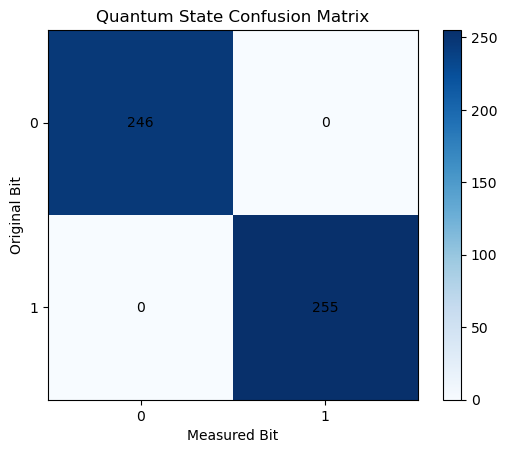

In [10]:
conf_matrix=np.zeros((2,2))
for b,m in zip(correct_bits,received_bits):
    conf_matrix[b,m]+=1
plt.imshow(conf_matrix,cmap='Blues')
plt.colorbar()
plt.xlabel('Measured Bit')
plt.ylabel('Original Bit')
plt.title('Quantum State Confusion Matrix')
plt.xticks([0,1])
plt.yticks([0,1])

for i in range(2):
    for j in range(2):
        plt.text(j,i,int(conf_matrix[i,j]),ha='center',va='center')
plt.show()

The confusion matrix shows that when the measurement basis matches the encodind basis ,all quantum state are perfectly distinguishable,result is zero error.This confirms that  quantum states can be reliable serve as crptographic symbol and any observed error in real system would indicate noise or potential evesdropping
 
## Key Takeaways
- Quantum states can represents cryptographic symbols
- Measurement basis choice directly affects correctness
- Wrong Measurement introduced detactable randomness
- Error rates are central to quantum security guarantees

---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day03_Qubit_As_CryptoSymbol.ipynb

**Date created**: 26-Janaury-2026

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>